# **Import Libraries and modules**

In [2]:
# https://keras.io/
# Installing Keras in Colab environment(Colab is Docker container with its own setup) and then import Keras library
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import numpy, Keras models, layers, utils and datasets modules
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
# Load MNIST dataset from Keras datasets module seperately as train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


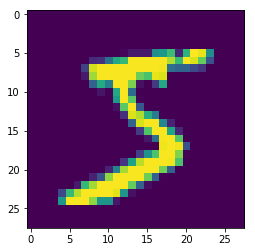

In [5]:
# Display the shape of train dataset. Also show the first image in the train dataset
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Reshape train and test dataset so that it also contains the channel information. MNIST contains grey scale images, hence this has just 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert the Tensor i.e. train and test dataset to float tensors. Also perform a min-max normalization where min = 0 and max = 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Show 10 items of labels from train dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# Show 10 labels from train dataset
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1.
#1x1 convolution used as a Transition block
from keras.layers import Activation
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPool2D,  Dropout, Flatten, BatchNormalization

# Input is an image of size 28x28 with 1 channel
model = Sequential()

 
model.add(Convolution2D(8, (3, 3), activation='relu', use_bias = False, input_shape=(28,28,1)))#Input channel 1, number of filters 8, filter size is 3x3 with 1 channel. Receptive field is 3x3
model.add(BatchNormalization()) #Batch normalization layer

model.add(Convolution2D(18, (3, 3), activation='relu', use_bias = False))#Input channel 8, number of filters 18, filter size is 3x3 with 8 channels. Receptive field is 5x5
model.add(BatchNormalization()) #Batch normalization layer

model.add(Convolution2D(40, (3, 3), activation='relu', use_bias = False))#Input channel 18, number of filters 40, filter size is 3x3 with 18 channels. Receptive field is 7x7
model.add(BatchNormalization()) #Batch normalization layer

model.add(Convolution2D(8, 1,  activation='relu', use_bias = False))#Input channel 40, number of filters 8, filter size is 1x1 with 40 channels. Receptive field is 7x7. This is transition block.
model.add(BatchNormalization()) #Batch normalization layer

model.add(MaxPooling2D(pool_size=(2, 2), strides=None))#Input channels 8, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 14x14. This is max pooling.
model.add(BatchNormalization()) #Batch normalization layer

model.add(Dropout(0.4)) #Droput layer





model.add(Convolution2D(16, (3, 3), activation='relu', use_bias = False))#Input channel 8, number of filters 16, filter size is 3x3 with 8 channels. Receptive field is 16x16
model.add(BatchNormalization()) #Batch normalization layer

model.add(Convolution2D(32, (3, 3), activation='relu', use_bias = False))#Input channel 16, number of filters 32, filter size is 3x3 with 16 channels. Receptive field is 18x18
model.add(BatchNormalization()) #Batch normalization layer

model.add(Convolution2D(10, 1,  activation='relu', use_bias = False))#Input channel 32, number of filters 10, filter size is 1x1 with 32 channels. Receptive field is 18x18. This is transition block.
model.add(BatchNormalization()) #Batch normalization layer

model.add(Dropout(0.4)) #Droput layer



model.add(Convolution2D(10, 7,  use_bias = False))#Input channel 10, number of filters 10, filter size is 7x7 with 10 channels. 
model.add(BatchNormalization()) #Batch normalization layer


model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Dropout(0.5)) #Droput layer
model.add(Activation('softmax')) #Softmax layer activation layer.So that the values of logits are squished between 0 and 1

In [23]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 18)        1296      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 18)        72        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 40)        6480      
_________________________________________________________________
batch_normalization_21 (Batc (None, 22, 22, 40)        160       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 8)         320       
__________

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed, specify learning rate.
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(0.1),
             metrics=['accuracy'])

In [0]:
# Obtain checkpoints for the model and save the model whenever validation accuracy improves. At the end of training, this results in the best model being saved.
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [26]:
# Train the model using fit function. Here, training set, validation set, batch size and number of epochs were passed as arguments

history = model.fit(X_train, Y_train, batch_size=2048, epochs=50, verbose=1, validation_data = (X_test, Y_test), callbacks=[mc])


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 76us/step - loss: 1.6116 - acc: 0.4427 - val_loss: 2.2743 - val_acc: 0.5265

Epoch 00001: val_acc improved from -inf to 0.52650, saving model to best_model.h5
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 1.1223 - acc: 0.5515 - val_loss: 0.4520 - val_acc: 0.8500

Epoch 00002: val_acc improved from 0.52650 to 0.85000, saving model to best_model.h5
Epoch 3/50
60000/60000 [==============================] - 3s 49us/step - loss: 1.0255 - acc: 0.5693 - val_loss: 0.1342 - val_acc: 0.9669

Epoch 00003: val_acc improved from 0.85000 to 0.96690, saving model to best_model.h5
Epoch 4/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.9829 - acc: 0.5775 - val_loss: 0.1150 - val_acc: 0.9728

Epoch 00004: val_acc improved from 0.96690 to 0.97280, saving model to best_model.h5
Epoch 5/50
60000/60000 [==============================] - 3s 

In [27]:
# Train the model using fit function. Here, training set, validation set, batch size and number of epochs were passed as arguments

history = model.fit(X_train, Y_train, batch_size=2048, epochs=50, verbose=1, validation_data = (X_test, Y_test), callbacks=[mc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.8695 - acc: 0.5934 - val_loss: 0.0261 - val_acc: 0.9919

Epoch 00001: val_acc improved from 0.99100 to 0.99190, saving model to best_model.h5
Epoch 2/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.8668 - acc: 0.5975 - val_loss: 0.0240 - val_acc: 0.9922

Epoch 00002: val_acc improved from 0.99190 to 0.99220, saving model to best_model.h5
Epoch 3/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.8702 - acc: 0.5958 - val_loss: 0.0242 - val_acc: 0.9919

Epoch 00003: val_acc did not improve from 0.99220
Epoch 4/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.8716 - acc: 0.5934 - val_loss: 0.0538 - val_acc: 0.9828

Epoch 00004: val_acc did not improve from 0.99220
Epoch 5/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.8660 - acc: 0.5971 - val_loss: 0.0240 - val_acc

In [0]:
# Load the best model which is saved during training process

from keras.models import load_model
saved_model = load_model('best_model.h5')

In [0]:
# Score the model i.e. evaluate the model using test data set.

score = saved_model.evaluate(X_test, Y_test, verbose=0)
#score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print(score)

[0.018491784818086308, 0.9947]


In [0]:
# Obtain the predictions from the model from test dataset.

y_pred = model.predict(X_test)

In [33]:
# Print 9 predictions from test dataset. Also print the actual labels from test dataset

print(y_pred[:9])
print(y_test[:9])

[[1.69018062e-08 3.60681696e-07 3.10462633e-06 1.46334332e-06
  2.85112208e-07 7.41371622e-08 9.32950694e-09 9.99994278e-01
  9.76837100e-08 3.40164036e-07]
 [2.11215070e-06 2.01556595e-05 9.99945283e-01 3.04563486e-07
  2.57309438e-07 1.83627904e-07 3.14105855e-05 9.70923324e-08
  1.38294567e-07 2.48863401e-08]
 [9.80267032e-07 9.99958873e-01 3.09549762e-07 1.25562826e-06
  2.11536571e-05 7.36688980e-06 2.43571480e-06 3.24601751e-06
  1.87962030e-06 2.58421687e-06]
 [9.97506440e-01 5.35654317e-06 1.62478609e-04 5.61491252e-05
  4.71103931e-06 1.13887945e-04 3.69043555e-04 4.56255202e-06
  4.08645748e-04 1.36875326e-03]
 [3.12984002e-06 3.80658753e-06 3.05660001e-06 1.15579348e-06
  9.99175847e-01 2.83056420e-06 1.01512678e-05 5.38488166e-07
  3.05143885e-06 7.96257227e-04]
 [1.45859451e-06 9.99959588e-01 3.18674893e-07 1.25871395e-06
  1.18593689e-05 7.77306377e-06 2.81618622e-06 3.83136512e-06
  2.44619446e-06 8.80201333e-06]
 [1.14759375e-08 8.32776277e-05 5.68555479e-05 6.75551419e

In [0]:
# Load the layers and layer names as dictionary

layer_dict = dict([(layer.name, layer) for layer in model.layers])

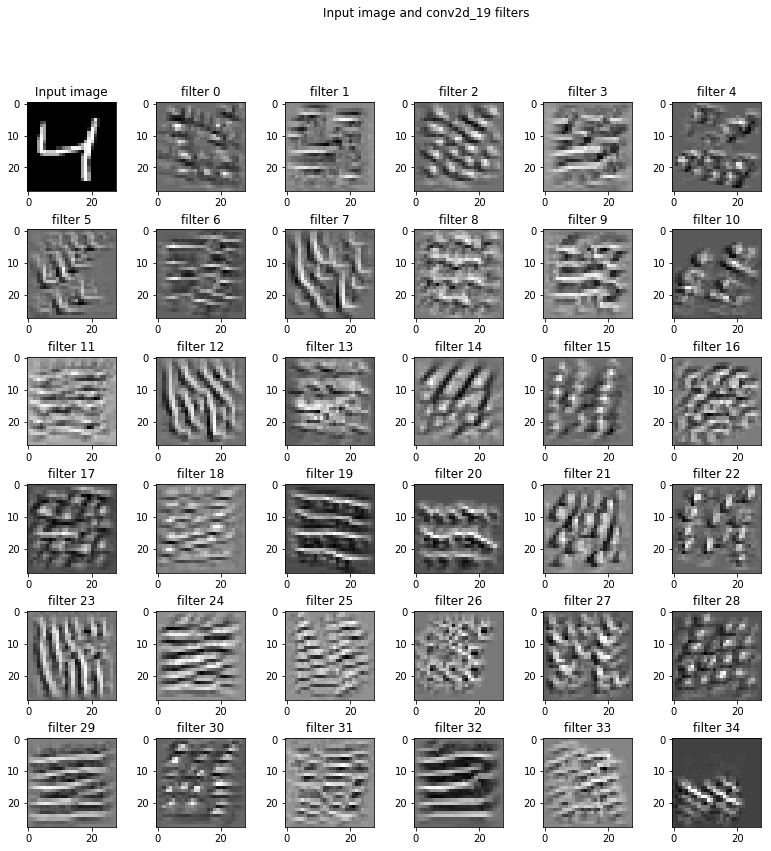

In [38]:
# The below code is used to visualize the intermediate activations (Ex:- conv2d_19) i.e. from the layer specified in the code for any given image.

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_19'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

### **References & Attributions:**

*   Keras (https://keras.io/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*